# Recognizing Handwritten digits in TensorFlow

Tutorial: https://www.tensorflow.org/versions/r0.10/tutorials/mnist/beginners/index.html#mnist-for-ml-beginners

In [3]:
import numpy as np
import pylab as pl

In [4]:
def show(image):
    pl.gray()
    pl.matshow(np.reshape(image, (28, 28)))
    pl.show()

## Get the Data

In [5]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [6]:
import tensorflow as tf
x = tf.placeholder(tf.float32, [None, 784])

Weights and biases variables

In [7]:
W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))

## The Model

In [8]:
y = tf.nn.softmax(tf.matmul(x, W) + b)

## Train

In [9]:
y_ = tf.placeholder(tf.float32, [None, 10])

In [10]:
cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y), reduction_indices=[1]))

In [11]:
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)

In [12]:
init = tf.initialize_all_variables()

In [13]:
sess = tf.Session()
sess.run(init)

In [14]:
for i in range(1000):
    batch_xs, batch_ys = mnist.train.next_batch(100)
    sess.run(train_step, feed_dict={x: batch_xs, y_: batch_ys})

In [15]:
def predict(image):
    return sess.run(tf.argmax(y, 1), {x: [image]})

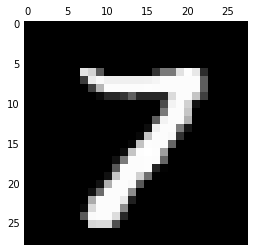

In [20]:
show(mnist.test.images[34])

In [21]:
predict(mnist.test.images[34])

array([7])